In [2]:
import matplotlib.pyplot as plt #importing all the required libraries to make our model
import numpy as np
import pandas as pd
import seaborn as sns

In [24]:
df = pd.read_csv('headbrain.csv') #importing our dataset using pandas
df.head() #checking the head of our data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [25]:
print(df.shape) #checking the nummber of rows and colummns in our dataset

(237, 4)


In [26]:
df.isnull().sum() #checking for any type of null values in our data

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

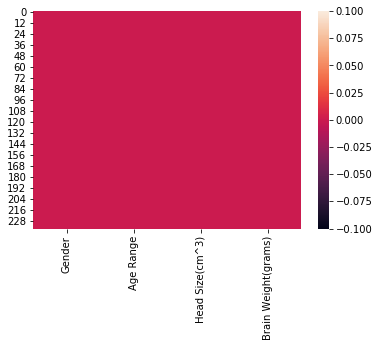

In [27]:
sns.heatmap(df.isnull()) #its usefull to use a heatmap to check for null values as well

In [33]:
df.describe() #finding out things like standard deviation,min value,max value,etc.

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [46]:
X = df['Head Size(cm^3)'].values #intializing our input and output values
Y = df['Brain Weight(grams)'].values

In [47]:
x_mean = np.mean(X) #calculting the mean of our input and output values
y_mean = np.mean(Y)
n = len(x) #total number of values

In [49]:
num = 0 #standard lin reg eq => y = mx+c
den = 0
for i in range(n):
    num += (X[i] - x_mean) * (Y[i] - y_mean)
    den += (X[i] - x_mean) **2
    
b1 = num/den #the slope or 'm'
b0 = y_mean - (b1*x_mean) #the bias or 'c'
print(b0 , b1)

325.57342104944223 0.26342933948939945


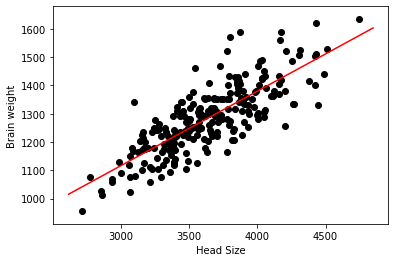

No handles with labels found to put in legend.


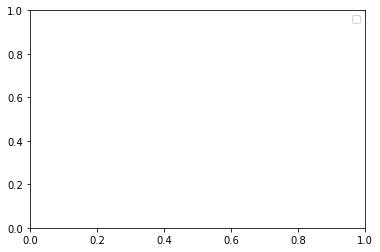

In [51]:
x_max = np.max(X) + 100
x_min = np.min(X) - 100
x = np.linspace(x_min,x_max,1000)
y = b0 + b1* x
plt.plot(x ,y , color = 'red',label = 'Linear Reg')
plt.scatter(X, Y, color='#000000', label='Data Point')
plt.xlabel('Head Size')
plt.ylabel('Brain weight')
plt.show()
plt.legend()

In [52]:
rmse = 0
for i in range(n):
    y_pred = b0 + b1*X[i]
    rmse += (Y[i] - y_pred) **2
rmse = np.sqrt(rmse/n)
print(rmse)

72.1206213783709


In [53]:
sos = 0
sor = 0
for i in range(n):
    y_pred = b0 + b1*X[i]
    sos += (Y[i] - y_mean) **2
    sor += (Y[i] - y_pred) **2
score = 1- (sor/sos)
print(score)

0.6393117199570003
